## Segmenting Shopping Customers:  for Targeted Marketing Campaigns

Objective: To identify distinct customer segments based on their income, age, and mall visits, in order to better understand the target customers and help the marketing team plan a more effective strategy.

Task: Using K-means clustering algorithm, cluster the customers based on their income, age, and mall visits, and determine the optimal number of clusters with labels for each.


#### Objective Market Segmentation
- Divide your mall target market into approachable groups. Create subsets of a market based on demographics behavioural criteria to better understand the target for marketing activities.


#### The approach
- 1- Perform some quick EDA (Exploratory Data Analysis)
- 2- Use KMEANS clustering algorithm to create our segments
- 3- Use Summary Statistics on the cluster
- 4- Visualize

#### Analysis
- Target group would be cluster 1 which has a high spending score and high income
- 60 percent of cluster 1 shoppers are woman. We should look for ways to affect these customers usng a marketing campaign targeting popular items in this cluster
- Cluster 2 presents an interesting opportunities to market to the customers for sales event on popular items

In [1]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Get the dataset
path = 'https://raw.githubusercontent.com/Gaelim/Mall-Customer-Segmentation/main/Mall_Customers.csv'
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Univariate analysis

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


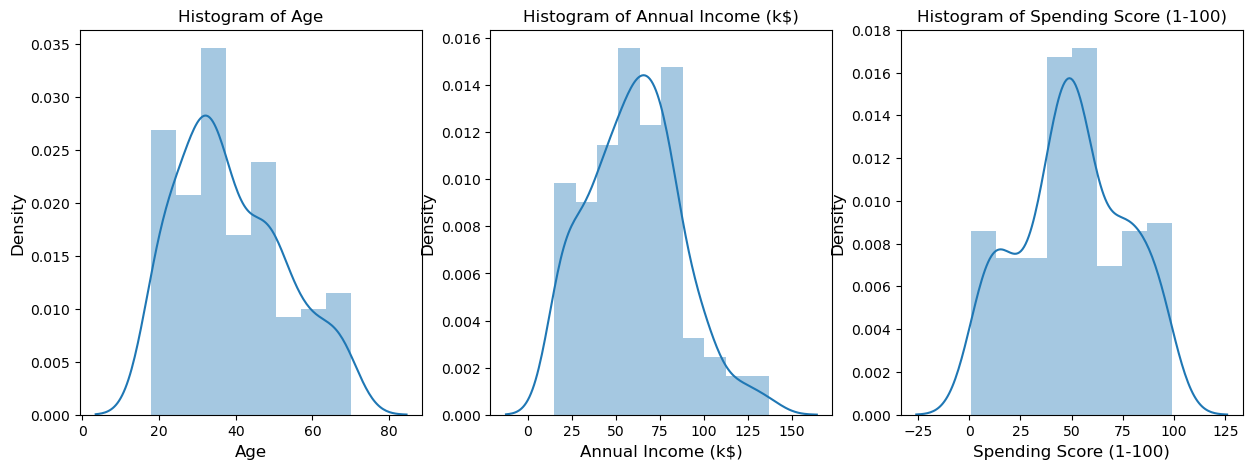

In [4]:
# define the list of column names
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# create a new figure with subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(15,5))

# loop through each column and create a histogram plot
for i, col in enumerate(cols):
    # plot the histogram with default options
    sns.distplot(df[col], ax=axes[i])
    
    # add title and axis labels
    axes[i].set_title(f"Histogram of {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Density", fontsize=12)

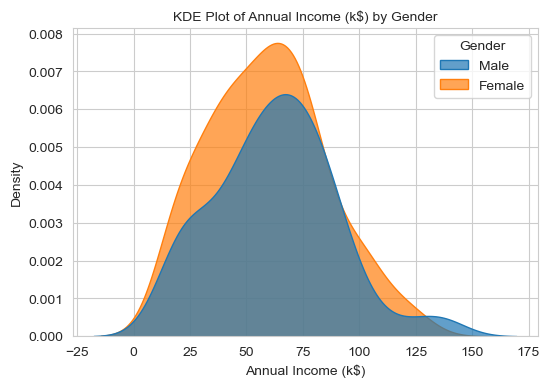

In [81]:
# set the style of the plot
sns.set_style("whitegrid")

# create a figure and axis object
fig, ax = plt.subplots(figsize=(6,4))

# plot the KDE plot with shaded density estimates
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True, alpha=0.7, ax=ax, legend=True)

# add title and axis labels
ax.set_title("KDE Plot of Annual Income (k$) by Gender", fontsize=10)
ax.set_xlabel("Annual Income (k$)", fontsize=10)
ax.set_ylabel("Density", fontsize=10)

# show the plot
plt.show()


- Hue : uses to break by dimension , we can use Gender
- From the result we can see that female portion is much more frequent and there is outlier as we can see there is fat tail skewed towards right.

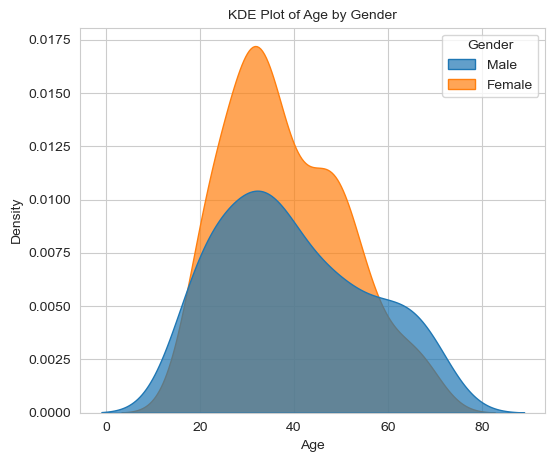

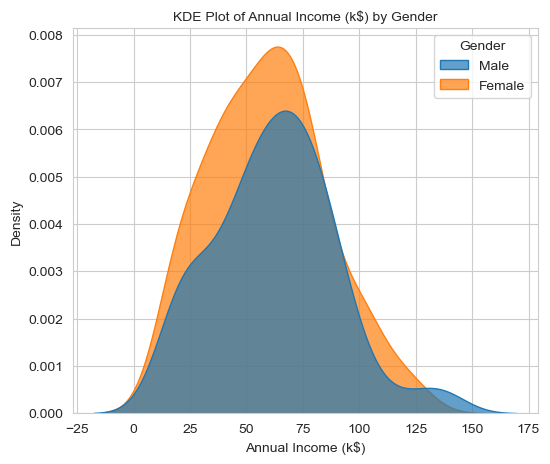

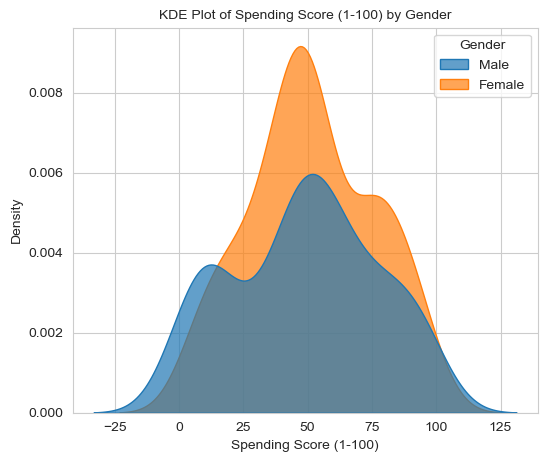

In [82]:
# loop through each column and create a KDE plot
# define the list of column names
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in cols:
    # create a new figure
    plt.figure(figsize=(6,5))
    
    # plot the KDE plot with shaded density estimates
    sns.kdeplot(data=df, x=i, hue='Gender', shade=True, alpha=0.7, legend=True)
    
    # add title and axis labels
    plt.title(f"KDE Plot of {i} by Gender", fontsize=10)
    plt.xlabel(i, fontsize=10)
    plt.ylabel("Density", fontsize=10)

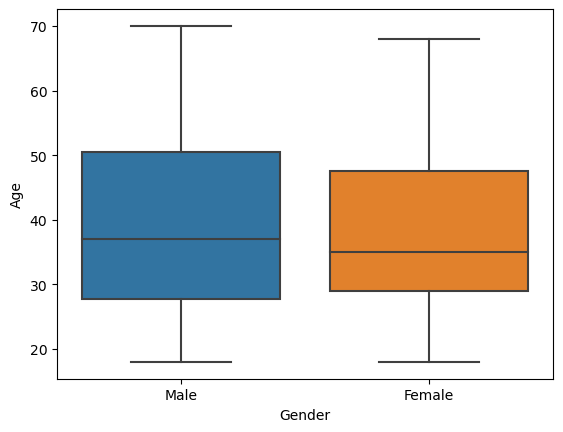

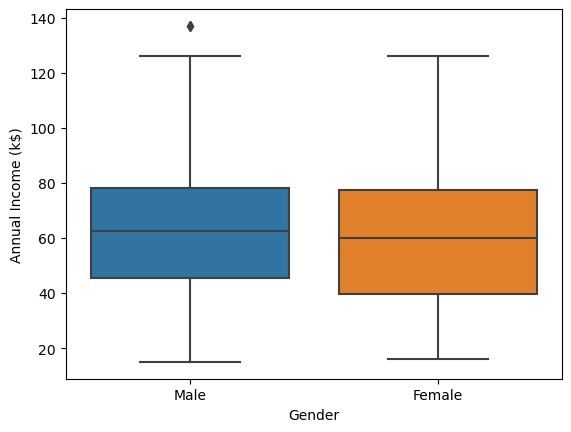

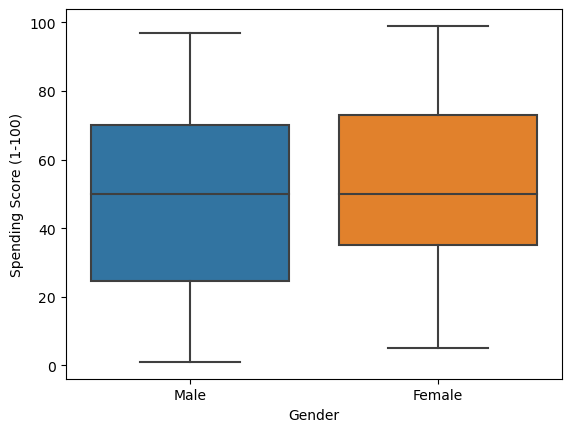

In [47]:
## looping to get figure for all in one
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in cols:
    plt.figure()  ## everytime you run create a visual
    sns.boxplot(data=df, x = 'Gender', y = df[i]);

In [50]:
df['Gender'].value_counts(normalize = True) ## getting the perentage

Female    0.56
Male      0.44
Name: Gender, dtype: float64

### Bivariate Analysis

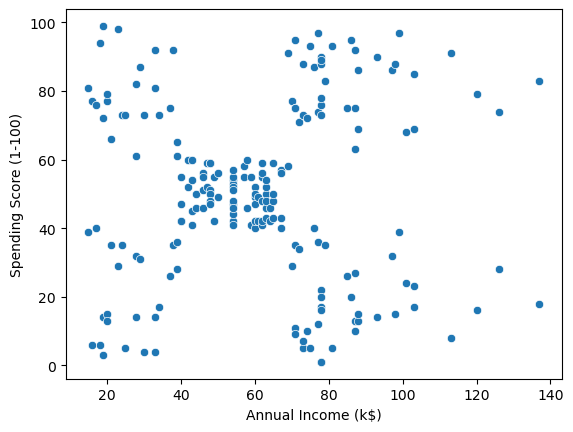

In [12]:
sns.scatterplot(data = df, x =  'Annual Income (k$)', y = 'Spending Score (1-100)' );

- In the result we can see there is some clustering and this tells there is bivariate clustering 

In [13]:
## drop the id: as it doesn't give any information
df = df.drop('CustomerID', axis  = 1)

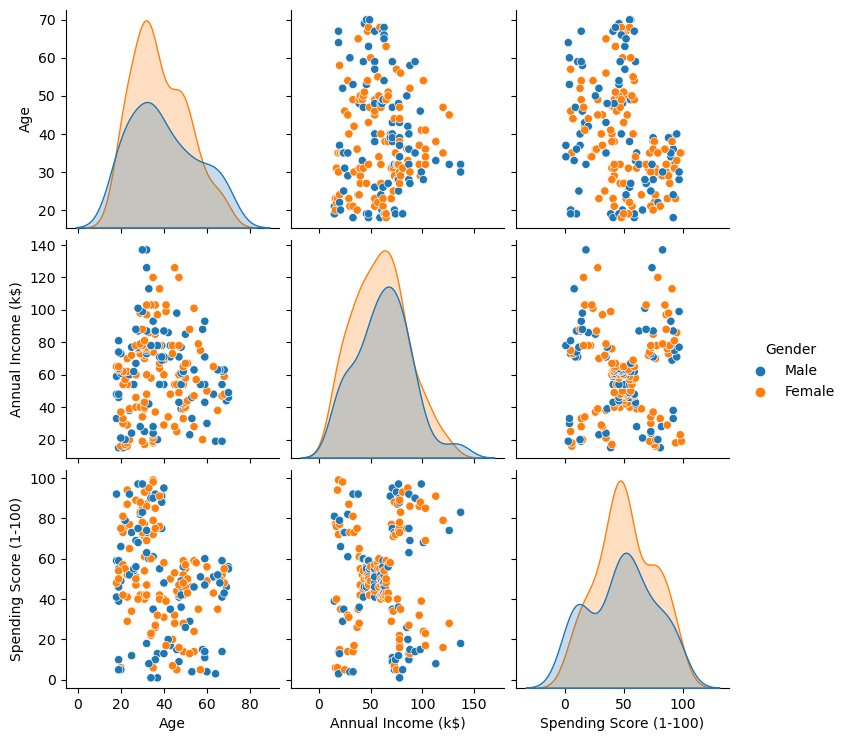

In [14]:
## easy way to explore
sns.pairplot(df, hue = 'Gender')

In [17]:
df.groupby('Gender').mean() # can specify that particular col you want as well

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [18]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


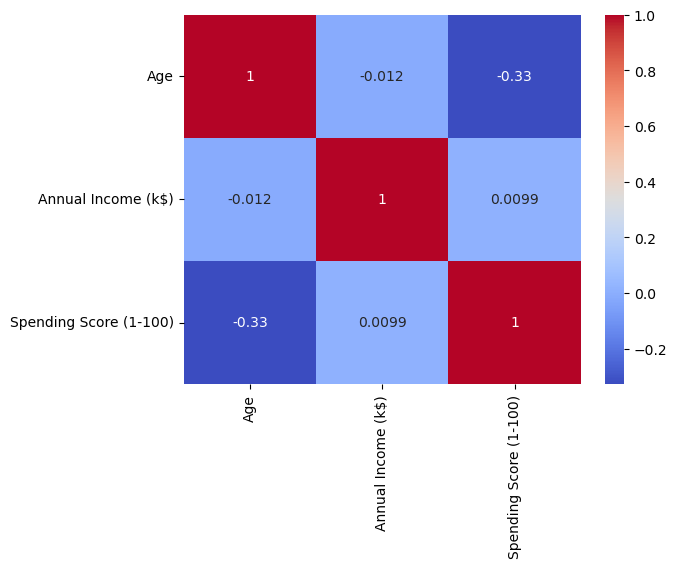

In [63]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm');

## Next_step: Clustering
- Univariate_clustering
- Bivariate_clustering
- Multivariate_clustering


### Univariate Clustering : using one variable

In [19]:
clustering1 = KMeans(n_clusters = 3)

In [20]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [21]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
## add to the origional_dataset
df['income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [23]:
df['income Cluster'].value_counts()

0    90
1    74
2    36
Name: income Cluster, dtype: int64

In [24]:
clustering1.inertia_  ## give the distance between the centroids

23517.330930930937

In [30]:
inertia_scores = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(Kmeans.inertia_)

In [31]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8667.679614837509,
 5050.904761904762,
 3941.4163614163617,
 2822.4996947496948,
 2234.450395682749,
 1786.2085081585083]

- The elbow rule or the elbow method is a heuristic approach that is used to determine the number of optimal principal components from the PCA results.

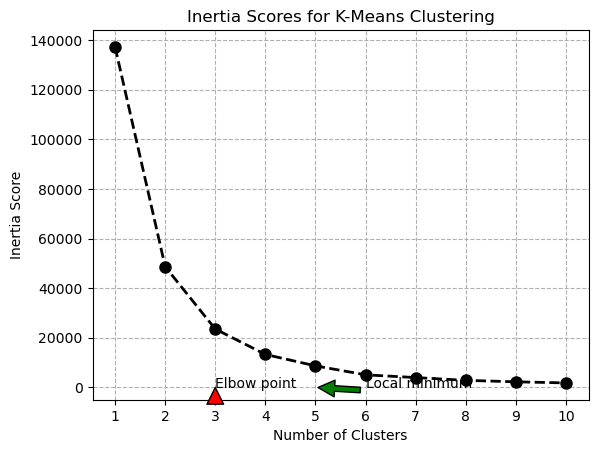

In [41]:
# plot the inertia scores
plt.plot(range(1, 11), inertia_scores, color='black', marker='o', markersize=8, linestyle='dashed', linewidth=2)

# add labels and title
plt.title("Inertia Scores for K-Means Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Score")

# add grid lines
plt.grid(True, linestyle='--')

# customize the x-axis tick labels
plt.xticks(range(1, 11), fontsize=10)

# add annotations for local minimums
plt.annotate("Elbow point", xy=(3, 3), xytext=(3, 3), arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate("Local minimum", xy=(5, 3), xytext=(6, 4), arrowprops=dict(facecolor='green', shrink=0.05))

# show the plot
plt.show()

- From the result it looks like the elbow starts at 5, so you go back and change the n_clustoring in to 3

In [35]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income Cluster'],
      dtype='object')

In [36]:
## analysis to find the mean
df.groupby('income Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


### Bivariate clustering

In [37]:
clustering2 = KMeans(n_clusters = 5)

In [38]:
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income
0,Male,19,15,39,1,2
1,Male,21,15,81,1,4
2,Female,20,16,6,1,2
3,Female,23,16,77,1,4
4,Female,31,17,40,1,2


In [42]:
##3 optimize the cluster
inertia_scores2 = []
for i in range(1, 11):
    Kmeans2 = KMeans(n_clusters = i)
    Kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(Kmeans2.inertia_)

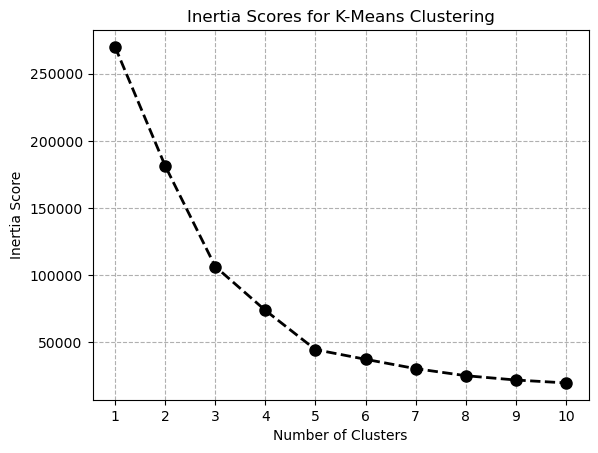

In [46]:
# plot the inertia scores
plt.plot(range(1, 11), inertia_scores2, color='black', marker='o', markersize=8, linestyle='dashed', linewidth=2)

# add labels and title
plt.title("Inertia Scores for K-Means Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Score")
plt.show()

- Here the elbaw is starting at 5 so we use the n_cluster as 5

In [47]:
clustering2.cluster_centers_ ## this gives the x and y variable for the centroid for all the 5 clustors

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [48]:
## Make a dataframe of the centroids : to add to the report
centers = pd.DataFrame(clustering2.cluster_centers_) 
centers.columns = ['x', 'y'] ## rename the columns
centers.head()

,x,y
0,86.538462,82.128205
1,55.296296,49.518519
2,26.304348,20.913043
3,88.200000,17.114286
4,25.727273,79.363636


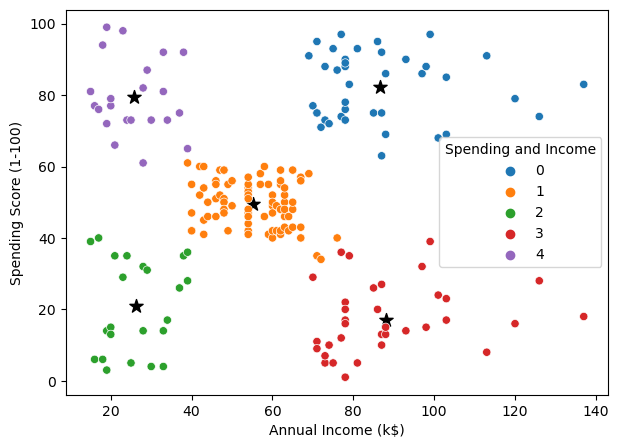

In [51]:
plt.figure(figsize = (7, 5))
plt.scatter(x=centers['x'], y = centers['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data =df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income', palette='tab10');
plt.savefig('clustering_bivariate.png')

In [52]:
pd.crosstab(df['Spending and Income'], df['Gender'])

Gender,Female,Male
Spending and Income,,
0,21,18
1,48,33
2,14,9
3,16,19
4,13,9


In [53]:
pd.crosstab(df['Spending and Income'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.608696,0.391304
3,0.457143,0.542857
4,0.590909,0.409091


- From the finding we can see that ..score 1 has the main target and has 0.538462 female and 0.461538 male

In [54]:
## analysis to find the mean
df.groupby('Spending and Income').mean()

,Age,Annual Income (k$),Spending Score (1-100),income Cluster
Spending and Income,,,,
0,32.692308,86.538462,82.128205,0.923077
1,42.716049,55.296296,49.518519,0.358025
2,45.217391,26.304348,20.913043,1.000000
3,41.114286,88.200000,17.114286,1.028571
4,25.272727,25.727273,79.363636,1.000000


#### Gender wise:
- Score 4: has the youngest value and has low income and high spending :)
- Score 1: has average number and with high income and high spending
- So the score 1 is the ideal one to run the campagn on

### Multivariate clustering

In [55]:
## working with the whole dataset need to be preprocessed
from sklearn.preprocessing import StandardScaler

In [56]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income
0,Male,19,15,39,1,2
1,Male,21,15,81,1,4
2,Female,20,16,6,1,2
3,Female,23,16,77,1,4
4,Female,31,17,40,1,2


In [57]:
df_n = pd.get_dummies(df)
df_n.head()

,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income,Gender_Female,Gender_Male
0,19,15,39,1,2,0,1
1,21,15,81,1,4,0,1
2,20,16,6,1,2,1,0
3,23,16,77,1,4,1,0
4,31,17,40,1,2,1,0


In [58]:
## we need one column of the dummy gender
df_n.drop('Gender_Female', axis = 1, inplace = True)

In [59]:
## get out columns
cols =  ['Age','Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
df_n = df_n[cols]
df_n.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [60]:
scale = StandardScaler()

In [61]:
df_n = scale.fit_transform(df_n)
df_n = pd.DataFrame(df_n)
df_n = df_n.rename(columns = {0 :'Age',
                              1:'Annual Income (k$)',
                              2:'Spending Score (1-100)',
                              3:'Gender_Male'})
df_n.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


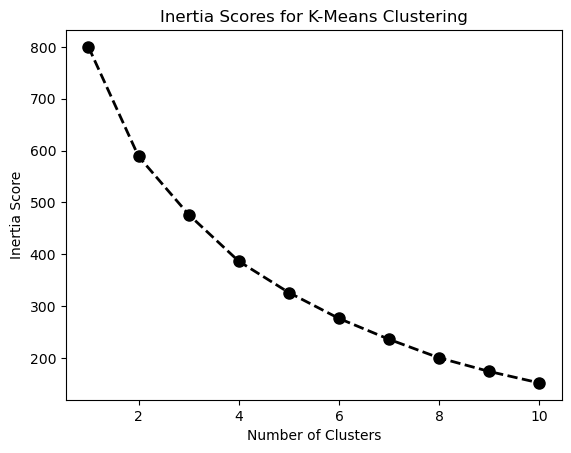

In [63]:
##3 optimize the cluster
inertia_scores3 = []
for i in range(1, 11):
    Kmeans3 = KMeans(n_clusters = i)
    Kmeans3.fit(df_n[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']])
    inertia_scores3.append(Kmeans3.inertia_)
# plot the inertia scores
plt.plot(range(1, 11), inertia_scores3, color='black', marker='o', markersize=8, linestyle='dashed', linewidth=2)

# add labels and title
plt.title("Inertia Scores for K-Means Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Score")
plt.show()

- From the finding we can see that at around 4 : there is the elbow

In [64]:
df.to_csv('Clustering.csv') ## save file for visualization

In [65]:
clustering3 = KMeans(n_clusters = 4)
clustering3.fit(df_n[['Annual Income (k$)','Spending Score (1-100)', 'Gender_Male']])
clustering3.labels_
df_n['Spending_Income_gender'] = clustering3.labels_
df_n.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Spending_Income_gender
0,-1.424569,-1.738999,-0.434801,1.128152,2
1,-1.281035,-1.738999,1.195704,1.128152,2
2,-1.352802,-1.700830,-1.715913,-0.886405,3
3,-1.137502,-1.700830,1.040418,-0.886405,3
4,-0.563369,-1.662660,-0.395980,-0.886405,3


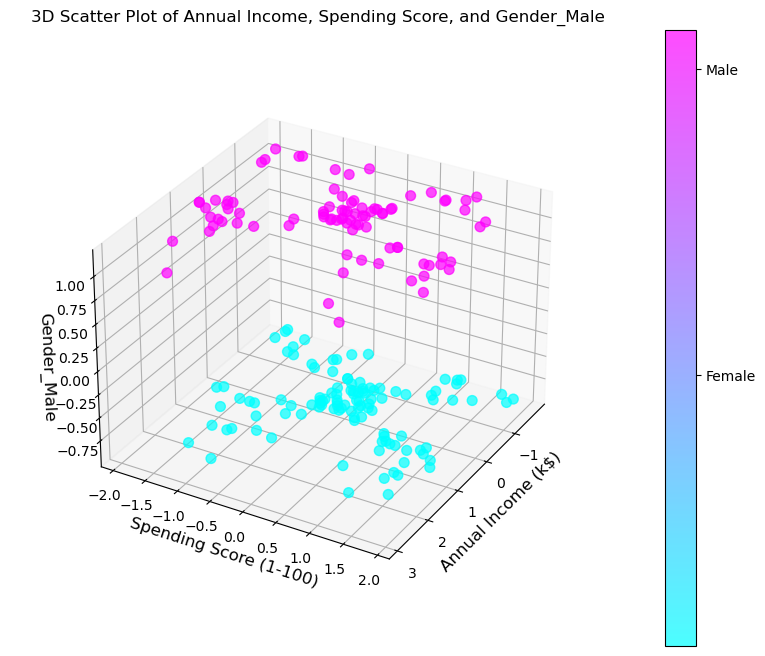

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# plot the 3D scatter plot
scatter = ax.scatter(df_n['Annual Income (k$)'], df_n['Spending Score (1-100)'], df_n['Gender_Male'], s=50, alpha=0.7, c=df_n['Gender_Male'], cmap='cool')

# add labels and title
ax.set_xlabel("Annual Income (k$)", fontsize=12)
ax.set_ylabel("Spending Score (1-100)", fontsize=12)
ax.set_zlabel("Gender_Male", fontsize=12)
ax.set_title("3D Scatter Plot of Annual Income, Spending Score, and Gender_Male", fontsize=12)

# add colorbar
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["Female", "Male"])

# customize the viewing angle and perspective
ax.view_init(30, 30)
ax.dist = 12

# show the plot
plt.show()


In [92]:
df2 = pd.read_csv('Clustering.csv')
df2.head()

,Unnamed: 0,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income
0,0,Male,19,15,39,1,2
1,1,Male,21,15,81,1,4
2,2,Female,20,16,6,1,2
3,3,Female,23,16,77,1,4
4,4,Female,31,17,40,1,2


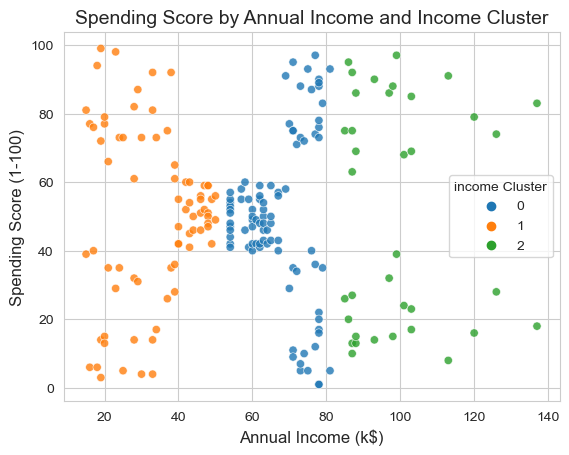

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# set the style of the plot
sns.set_style("whitegrid")

# create a scatter plot with different colors for each income cluster
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', hue='income Cluster', palette='tab10', alpha=0.8)

# add axis labels and title
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Spending Score by Annual Income and Income Cluster', fontsize=14)

# show the plot
plt.show()
